In [1]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import json

In [2]:
# Load the USDA food database from a JSON file
usda_database = json.load(open("/content/drive/MyDrive/Datasets/usda_food/database.json"))


In [3]:
# Check the length of the database
num_records = len(usda_database)
num_records

6636

In [4]:
# Get the keys of the first record in the database
first_record_keys = usda_database[0].keys()
first_record_keys

dict_keys(['id', 'description', 'tags', 'manufacturer', 'group', 'portions', 'nutrients'])

In [5]:
# Extract the first nutrient entry from the first record
first_nutrient_entry = usda_database[0]["nutrients"][0]
first_nutrient_entry

{'value': 25.18,
 'units': 'g',
 'description': 'Protein',
 'group': 'Composition'}

In [6]:
# Create a DataFrame containing nutrients data from the first record
nutrient_data_df = pd.DataFrame(usda_database[0]["nutrients"])


In [ ]:
# Display the first 10 rows of the nutrients DataFrame
nutrient_data_head = nutrient_data_df.head(10)
nutrient_data_head

,value,units,description,group
0,25.18,g,Protein,Composition
1,29.20,g,Total lipid (fat),Composition
2,3.06,g,"Carbohydrate, by difference",Composition
3,3.28,g,Ash,Other
4,376.00,kcal,Energy,Energy
5,39.28,g,Water,Composition
6,1573.00,kJ,Energy,Energy
7,0.00,g,"Fiber, total dietary",Composition
8,673.00,mg,"Calcium, Ca",Elements
9,0.64,mg,"Iron, Fe",Elements


In [7]:
# Define a list of keys to extract from the database
info_keys = ["description", "group", "id", "manufacturer"]

In [8]:
# Create a DataFrame containing selected information from the database
info_df = pd.DataFrame(usda_database, columns=info_keys)

In [9]:
# Display the first 10 rows of the information DataFrame
info_df_head = info_df.head(10)
info_df_head

,description,group,id,manufacturer
0,"Cheese, caraway",Dairy and Egg Products,1008,
1,"Cheese, cheddar",Dairy and Egg Products,1009,
2,"Cheese, edam",Dairy and Egg Products,1018,
3,"Cheese, feta",Dairy and Egg Products,1019,
4,"Cheese, mozzarella, part skim milk",Dairy and Egg Products,1028,
5,"Cheese, mozzarella, part skim milk, low moisture",Dairy and Egg Products,1029,
6,"Cheese, romano",Dairy and Egg Products,1038,
7,"Cheese, roquefort",Dairy and Egg Products,1039,
8,"Cheese spread, pasteurized process, american, ...",Dairy and Egg Products,1048,
9,"Cream, fluid, half and half",Dairy and Egg Products,1049,


In [10]:
# Get information about the columns in the information DataFrame
info_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6636 entries, 0 to 6635
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   description   6636 non-null   object
 1   group         6636 non-null   object
 2   id            6636 non-null   int64 
 3   manufacturer  5195 non-null   object
dtypes: int64(1), object(3)
memory usage: 207.5+ KB


In [11]:
# Count the frequency of each 'group' in the information DataFrame
group_counts = pd.value_counts(info_df["group"])[:10]
group_counts

Vegetables and Vegetable Products    812
Beef Products                        618
Baked Products                       496
Breakfast Cereals                    403
Legumes and Legume Products          365
Fast Foods                           365
Lamb, Veal, and Game Products        345
Sweets                               341
Fruits and Fruit Juices              328
Pork Products                        328
Name: group, dtype: int64

In [12]:
# Create an empty list to store nutrient data from all records
all_nutrient_data = []

# Loop through each record in the database and append nutrient data to the list
for record in usda_database:
    food_nutrients = pd.DataFrame(record['nutrients'])
    food_nutrients['id'] = record['id']
    all_nutrient_data.append(food_nutrients)

# Concatenate all nutrient data into a single DataFrame
nutrients_df = pd.concat(all_nutrient_data, ignore_index=True)

In [13]:
# Preview nutrients DataFrame
nutrients_df

,value,units,description,group,id
0,25.180,g,Protein,Composition,1008
1,29.200,g,Total lipid (fat),Composition,1008
2,3.060,g,"Carbohydrate, by difference",Composition,1008
3,3.280,g,Ash,Other,1008
4,376.000,kcal,Energy,Energy,1008
...,...,...,...,...,...
389350,0.000,mcg,"Vitamin B-12, added",Vitamins,43546
389351,0.000,mg,Cholesterol,Other,43546
389352,0.072,g,"Fatty acids, total saturated",Other,43546
389353,0.028,g,"Fatty acids, total monounsaturated",Other,43546


In [14]:
# See number of duplicates
nutrients_df.duplicated().sum()

14179

In [15]:
# Check for and remove duplicate rows in the nutrients DataFrame
nutrients_df = nutrients_df.drop_duplicates()

In [16]:
# Preview DataFrame
nutrients_df

,value,units,description,group,id
0,25.180,g,Protein,Composition,1008
1,29.200,g,Total lipid (fat),Composition,1008
2,3.060,g,"Carbohydrate, by difference",Composition,1008
3,3.280,g,Ash,Other,1008
4,376.000,kcal,Energy,Energy,1008
...,...,...,...,...,...
389350,0.000,mcg,"Vitamin B-12, added",Vitamins,43546
389351,0.000,mg,Cholesterol,Other,43546
389352,0.072,g,"Fatty acids, total saturated",Other,43546
389353,0.028,g,"Fatty acids, total monounsaturated",Other,43546


In [17]:
# Checking DataFrame info
nutrients_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 375176 entries, 0 to 389354
Data columns (total 5 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   value        375176 non-null  float64
 1   units        375176 non-null  object 
 2   description  375176 non-null  object 
 3   group        375176 non-null  object 
 4   id           375176 non-null  int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 17.2+ MB


In [18]:
# Rename columns in the information DataFrame
info_df.rename(columns={"description": "food", "group": "food_group"}, inplace=True)

In [19]:
# Get information about the columns in the renamed information DataFrame
info_df_info_updated = info_df.info()
info_df_info_updated

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6636 entries, 0 to 6635
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   food          6636 non-null   object
 1   food_group    6636 non-null   object
 2   id            6636 non-null   int64 
 3   manufacturer  5195 non-null   object
dtypes: int64(1), object(3)
memory usage: 207.5+ KB


In [20]:
# Rename columns in the nutrients DataFrame
nutrients_df.rename(columns={"description": "nutrient", "group": "nutrient_group"}, inplace=True)

<ipython-input-20-d3e7aa90347b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nutrients_df.rename(columns={"description": "nutrient", "group": "nutrient_group"}, inplace=True)


In [21]:
# Preview DataFrame after renaming columns
nutrients_df

,value,units,nutrient,nutrient_group,id
0,25.180,g,Protein,Composition,1008
1,29.200,g,Total lipid (fat),Composition,1008
2,3.060,g,"Carbohydrate, by difference",Composition,1008
3,3.280,g,Ash,Other,1008
4,376.000,kcal,Energy,Energy,1008
...,...,...,...,...,...
389350,0.000,mcg,"Vitamin B-12, added",Vitamins,43546
389351,0.000,mg,Cholesterol,Other,43546
389352,0.072,g,"Fatty acids, total saturated",Other,43546
389353,0.028,g,"Fatty acids, total monounsaturated",Other,43546


In [22]:
# Merge the nutrients and information DataFrames on the 'id' column
merged_data = pd.merge(nutrients_df, info_df, on="id")

In [23]:
# Get information about the merged DataFrame
merged_data_info = merged_data.info()
merged_data_info

<class 'pandas.core.frame.DataFrame'>
Int64Index: 375176 entries, 0 to 375175
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   value           375176 non-null  float64
 1   units           375176 non-null  object 
 2   nutrient        375176 non-null  object 
 3   nutrient_group  375176 non-null  object 
 4   id              375176 non-null  int64  
 5   food            375176 non-null  object 
 6   food_group      375176 non-null  object 
 7   manufacturer    293054 non-null  object 
dtypes: float64(1), int64(1), object(6)
memory usage: 25.8+ MB


In [24]:
# Retrieve and display a specific row from the merged DataFrame
specific_row = merged_data.iloc[30000]
specific_row

value                                               0.04
units                                                  g
nutrient                                         Glycine
nutrient_group                               Amino Acids
id                                                  6158
food              Soup, tomato bisque, canned, condensed
food_group                    Soups, Sauces, and Gravies
manufacturer                                            
Name: 30000, dtype: object

In [25]:
# Group data by nutrient and food group, calculating the median value
median_values = merged_data.groupby(["nutrient", "food_group"])["value"].quantile(0.5)

<ipython-input-26-c16ffd68a0da>:5: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


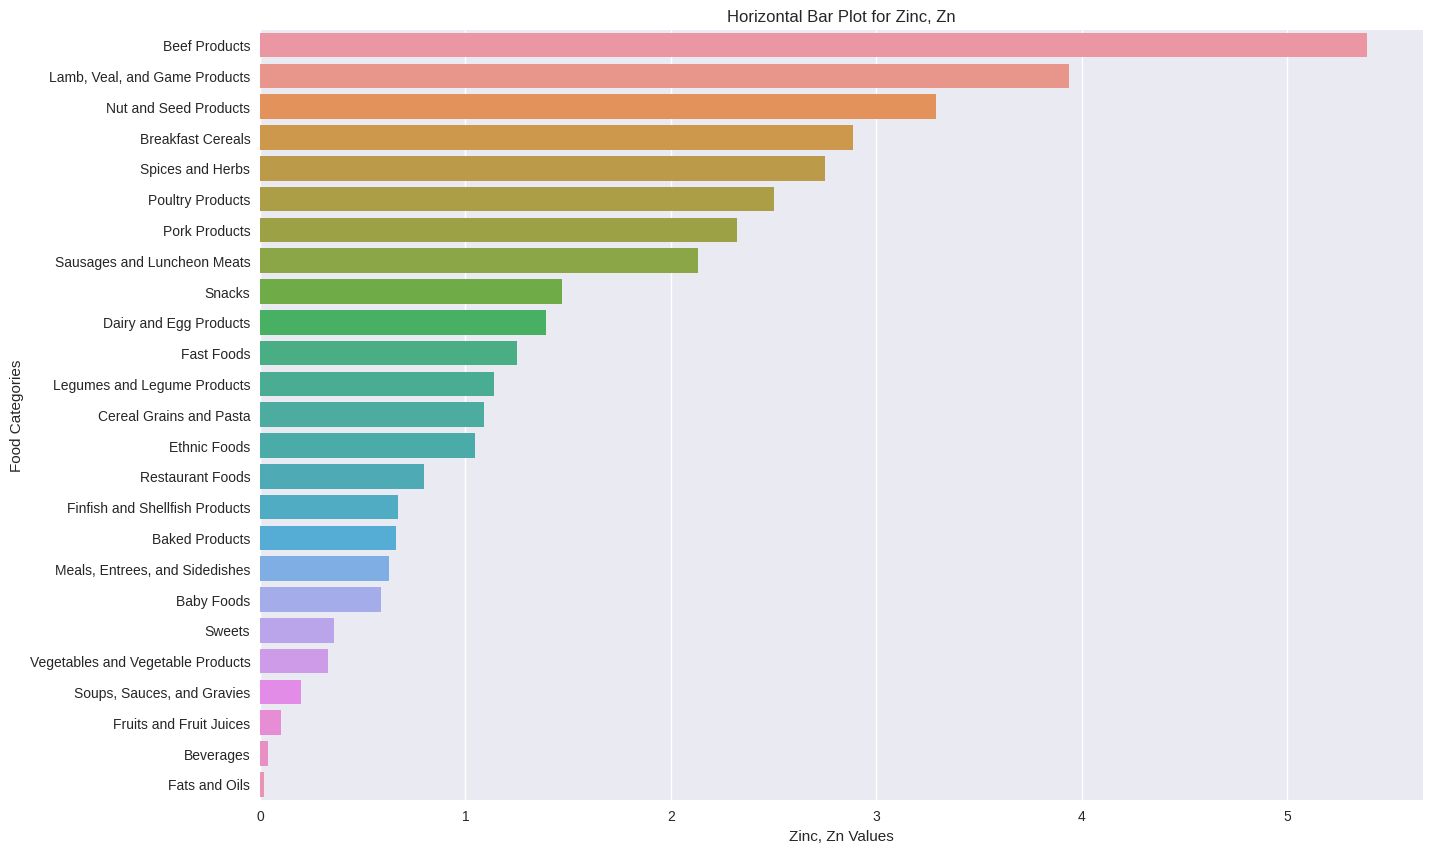

In [26]:
# Sort Zinc, Zn data in descending order
sorted_zinc_data = median_values["Zinc, Zn"].sort_values(ascending=False)

# Set Style for the plot
plt.style.use('seaborn')

# Create a horizontal bar plot using Seaborn
fig, ax = plt.subplots(figsize=(15, 10))
sns.barplot(x=sorted_zinc_data.values, y=sorted_zinc_data.index, orient="h")

# Set labels and title for the plot
ax.set(xlabel="Zinc, Zn Values", ylabel="Food Categories", title="Horizontal Bar Plot for Zinc, Zn")

# Show the plot
plt.show()

In [27]:
# Group data by nutrient group and nutrient, then find foods with the maximum value
def get_maximum(x):
    return x.loc[x.value.idxmax()]
max_foods = merged_data.groupby(['nutrient_group', 'nutrient']).apply(get_maximum)[["value", "food"]]

In [28]:
# Truncate food names to the first 50 characters
max_foods['food'] = max_foods['food'].str[:50]

In [29]:
# Retrieve the food with the maximum value in the "Amino Acids" nutrient group
amino_acids_max_food = max_foods.loc["Amino Acids"]["food"]
amino_acids_max_food

nutrient
Alanine                           Gelatins, dry powder, unsweetened
Arginine                               Seeds, sesame flour, low-fat
Aspartic acid                                   Soy protein isolate
Cystine                Seeds, cottonseed flour, low fat (glandless)
Glutamic acid                                   Soy protein isolate
Glycine                           Gelatins, dry powder, unsweetened
Histidine                Whale, beluga, meat, dried (Alaska Native)
Hydroxyproline    KENTUCKY FRIED CHICKEN, Fried Chicken, ORIGINA...
Isoleucine        Soy protein isolate, PROTEIN TECHNOLOGIES INTE...
Leucine           Soy protein isolate, PROTEIN TECHNOLOGIES INTE...
Lysine            Seal, bearded (Oogruk), meat, dried (Alaska Na...
Methionine                    Fish, cod, Atlantic, dried and salted
Phenylalanine     Soy protein isolate, PROTEIN TECHNOLOGIES INTE...
Proline                           Gelatins, dry powder, unsweetened
Serine            Soy protein isolate, 

In [30]:
merged_data[:50]

,value,units,nutrient,nutrient_group,id,food,food_group,manufacturer
0,25.180,g,Protein,Composition,1008,"Cheese, caraway",Dairy and Egg Products,
1,29.200,g,Total lipid (fat),Composition,1008,"Cheese, caraway",Dairy and Egg Products,
2,3.060,g,"Carbohydrate, by difference",Composition,1008,"Cheese, caraway",Dairy and Egg Products,
3,3.280,g,Ash,Other,1008,"Cheese, caraway",Dairy and Egg Products,
4,376.000,kcal,Energy,Energy,1008,"Cheese, caraway",Dairy and Egg Products,
5,39.280,g,Water,Composition,1008,"Cheese, caraway",Dairy and Egg Products,
6,1573.000,kJ,Energy,Energy,1008,"Cheese, caraway",Dairy and Egg Products,
7,0.000,g,"Fiber, total dietary",Composition,1008,"Cheese, caraway",Dairy and Egg Products,
8,673.000,mg,"Calcium, Ca",Elements,1008,"Cheese, caraway",Dairy and Egg Products,
9,0.640,mg,"Iron, Fe",Elements,1008,"Cheese, caraway",Dairy and Egg Products,


In [31]:
# Specify the file path or name
file_path = "usda_nutrients.csv"

# Use the to_csv function to write the DataFrame to a CSV file
merged_data.to_csv(file_path, index=False)

<ipython-input-32-ca8d9c38c7cf>:7: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn")


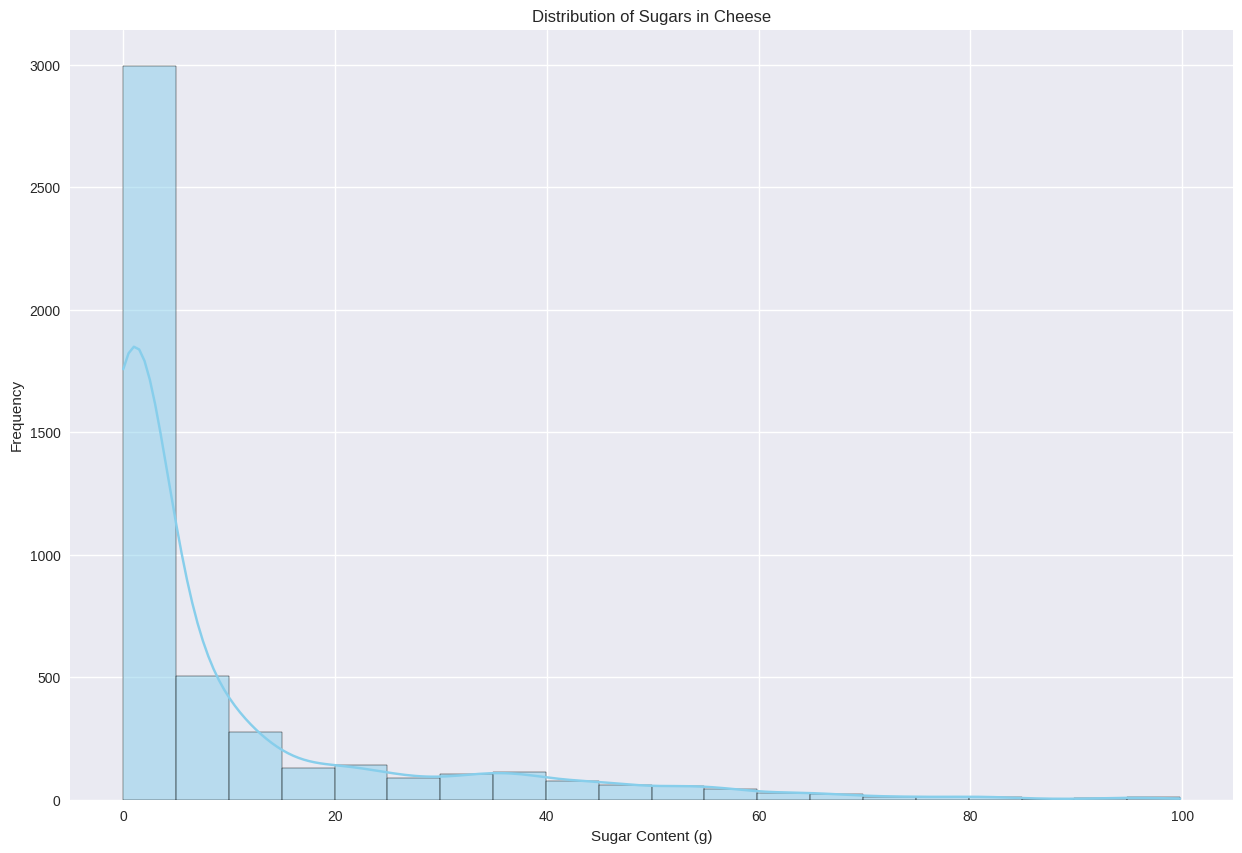

In [32]:
# Insight: Distribution of Sugars in Cheese

# Filter the data for sugar content
sugar_data = merged_data[merged_data['nutrient'] == 'Sugars, total']

# Set the style for the plot
plt.style.use("seaborn")

# Create a histogram
plt.figure(figsize=(15, 10))
sns.histplot(data=sugar_data, x='value', bins=20, kde=True, color='skyblue')

# Set labels and title
plt.xlabel('Sugar Content (g)')
plt.ylabel('Frequency')
plt.title('Distribution of Sugars in Cheese')

# Show the histogram
plt.show()


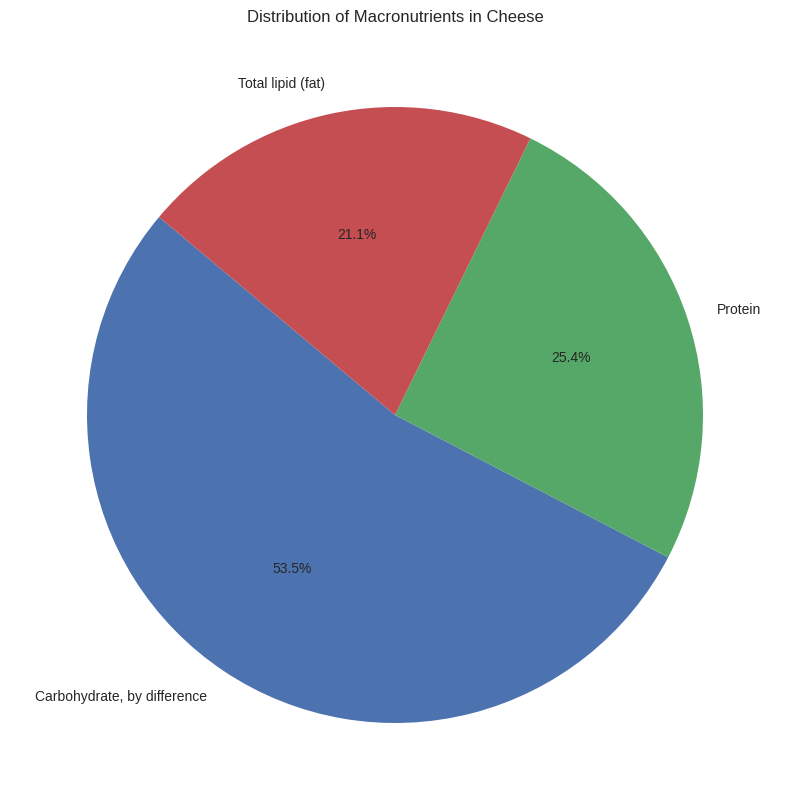

In [ ]:
# Insight: Distribution of Macronutrients (Protein, Fat, Carbohydrates) in Cheese

# Filter the data for macronutrients (Protein, Fat, Carbohydrates)
macronutrients_data = merged_data[merged_data['nutrient'].isin(['Protein', 'Total lipid (fat)', 'Carbohydrate, by difference'])]

# Sum the values for each macronutrient
macronutrients_sum = macronutrients_data.groupby('nutrient')['value'].sum()

# Create a pie chart
plt.figure(figsize=(10, 10))
plt.pie(macronutrients_sum, labels=macronutrients_sum.index, autopct='%1.1f%%', startangle=140)

# Set the title
plt.title('Distribution of Macronutrients in Cheese')

# Show the pie chart
plt.show()

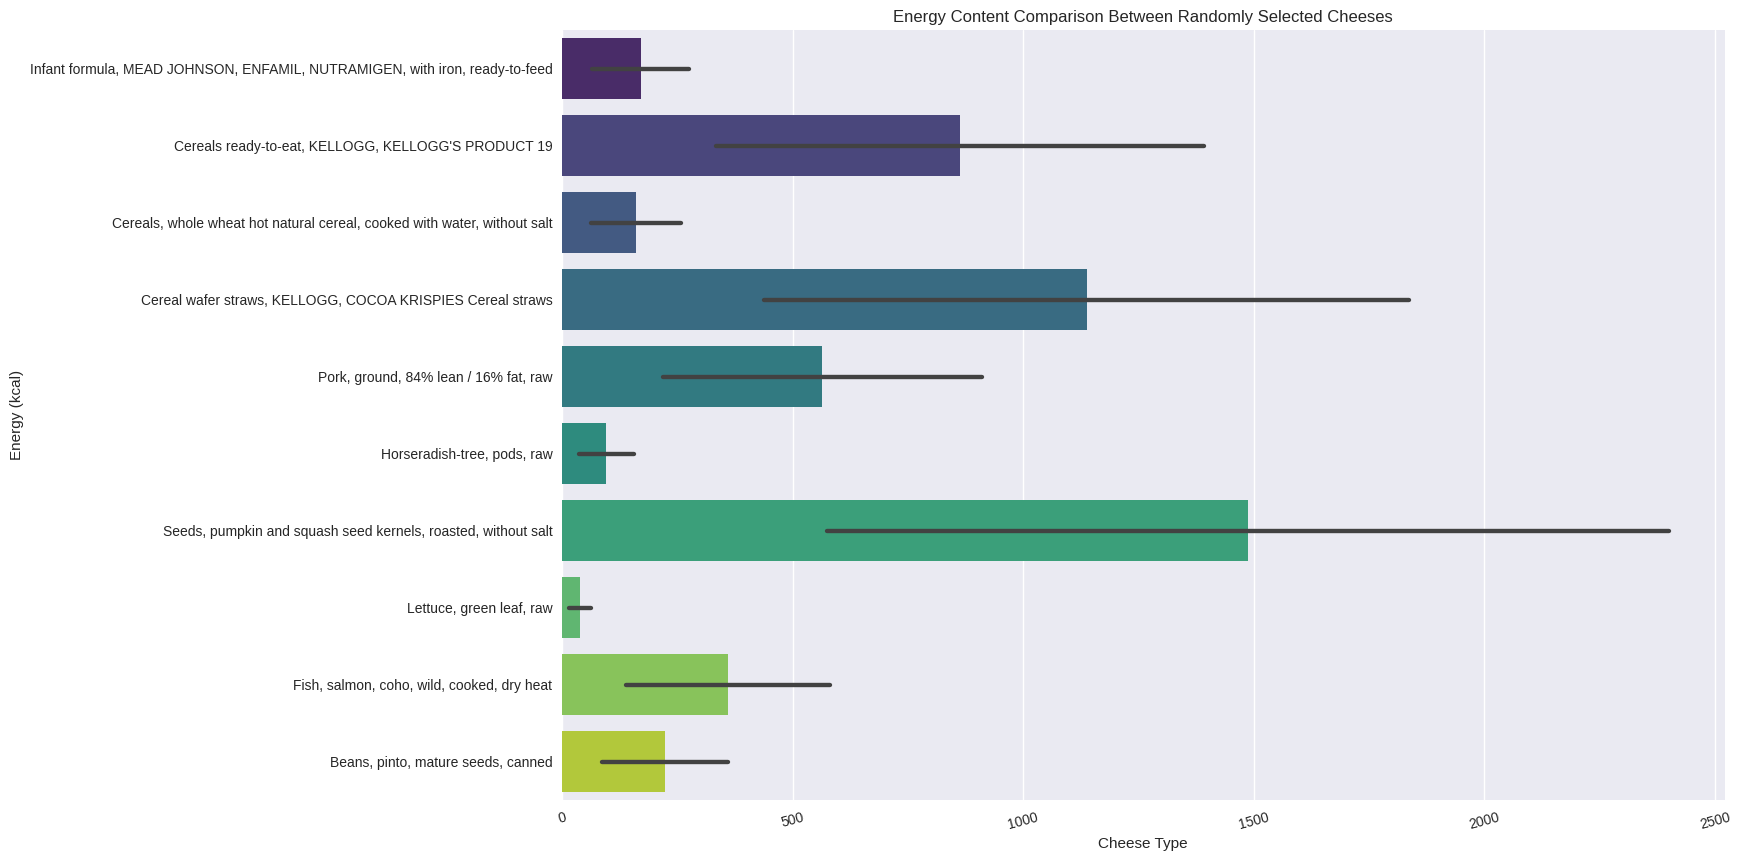

In [ ]:
# Insight: Energy Content Comparison Between Different Cheeses
import random   # more info on why random was used

# Filter the data for energy content (kcal)
energy_data = merged_data[merged_data['nutrient'] == 'Energy']

# Select a random sample of cheese types (e.g., 10) for comparison
random.seed(42)  # Set a seed for reproducibility
cheese_sample = random.sample(energy_data['food'].unique().tolist(), 10)

# Filter the data for the selected cheese types
energy_data_subset = energy_data[energy_data['food'].isin(cheese_sample)]

# Create a bar chart
plt.figure(figsize=(15, 10))
sns.barplot(x='value', y='food', data=energy_data_subset, palette='viridis')

# Set labels and title
plt.xlabel('Cheese Type')
plt.ylabel('Energy (kcal)')
plt.title('Energy Content Comparison Between Randomly Selected Cheeses')

# Rotate x-axis labels for better readability
plt.xticks(rotation=15)

# Show the bar chart
plt.show()


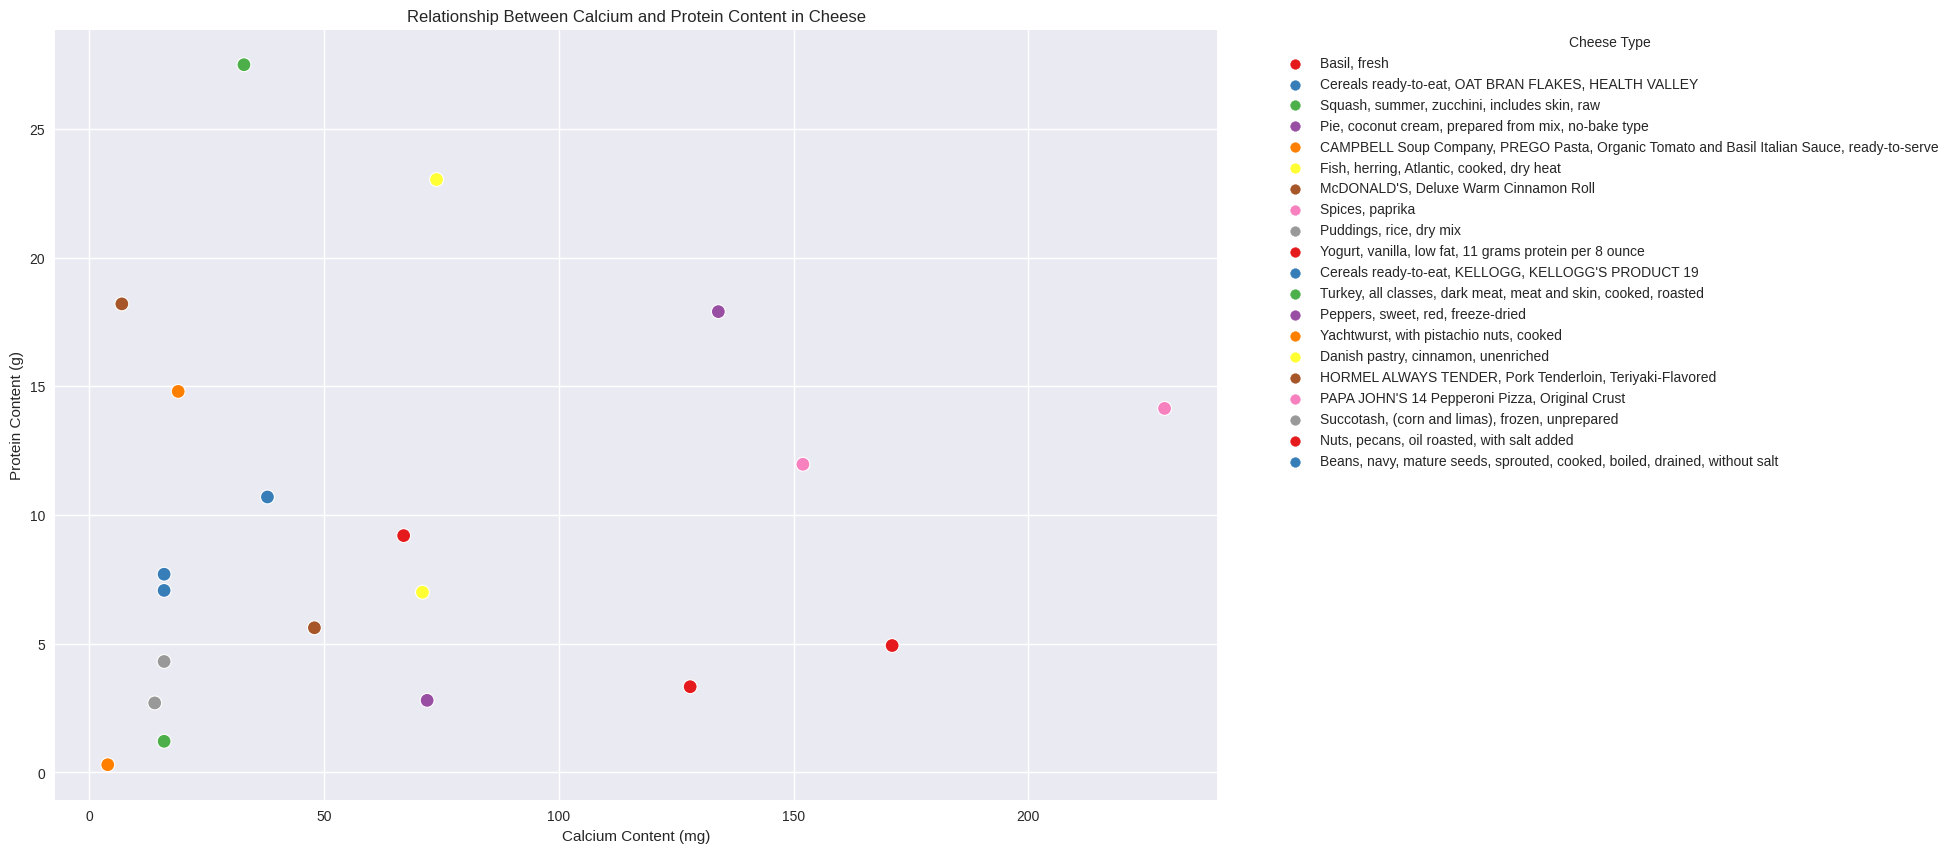

In [ ]:
# Insight: Relationship Between Calcium and Protein Content

# Filter the data for calcium and protein content
calcium_protein_data = merged_data[(merged_data['nutrient'] == 'Calcium, Ca') | (merged_data['nutrient'] == 'Protein')]

# Aggregate data by taking the mean values for each cheese type
aggregated_data = calcium_protein_data.groupby(['food', 'nutrient'])['value'].mean().unstack()

# Select a subset of data to plot
subset = aggregated_data.sample(n=20, random_state=1)

# Create a scatter plot
plt.figure(figsize=(15, 10))
sns.scatterplot(data=subset, x='Calcium, Ca', y='Protein', hue=subset.index, palette='Set1', s=100)

# Set labels and title
plt.xlabel('Calcium Content (mg)')
plt.ylabel('Protein Content (g)')
plt.title('Relationship Between Calcium and Protein Content in Cheese')

# Show the scatter plot with legend outside the plot
plt.legend(title='Cheese Type', bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()


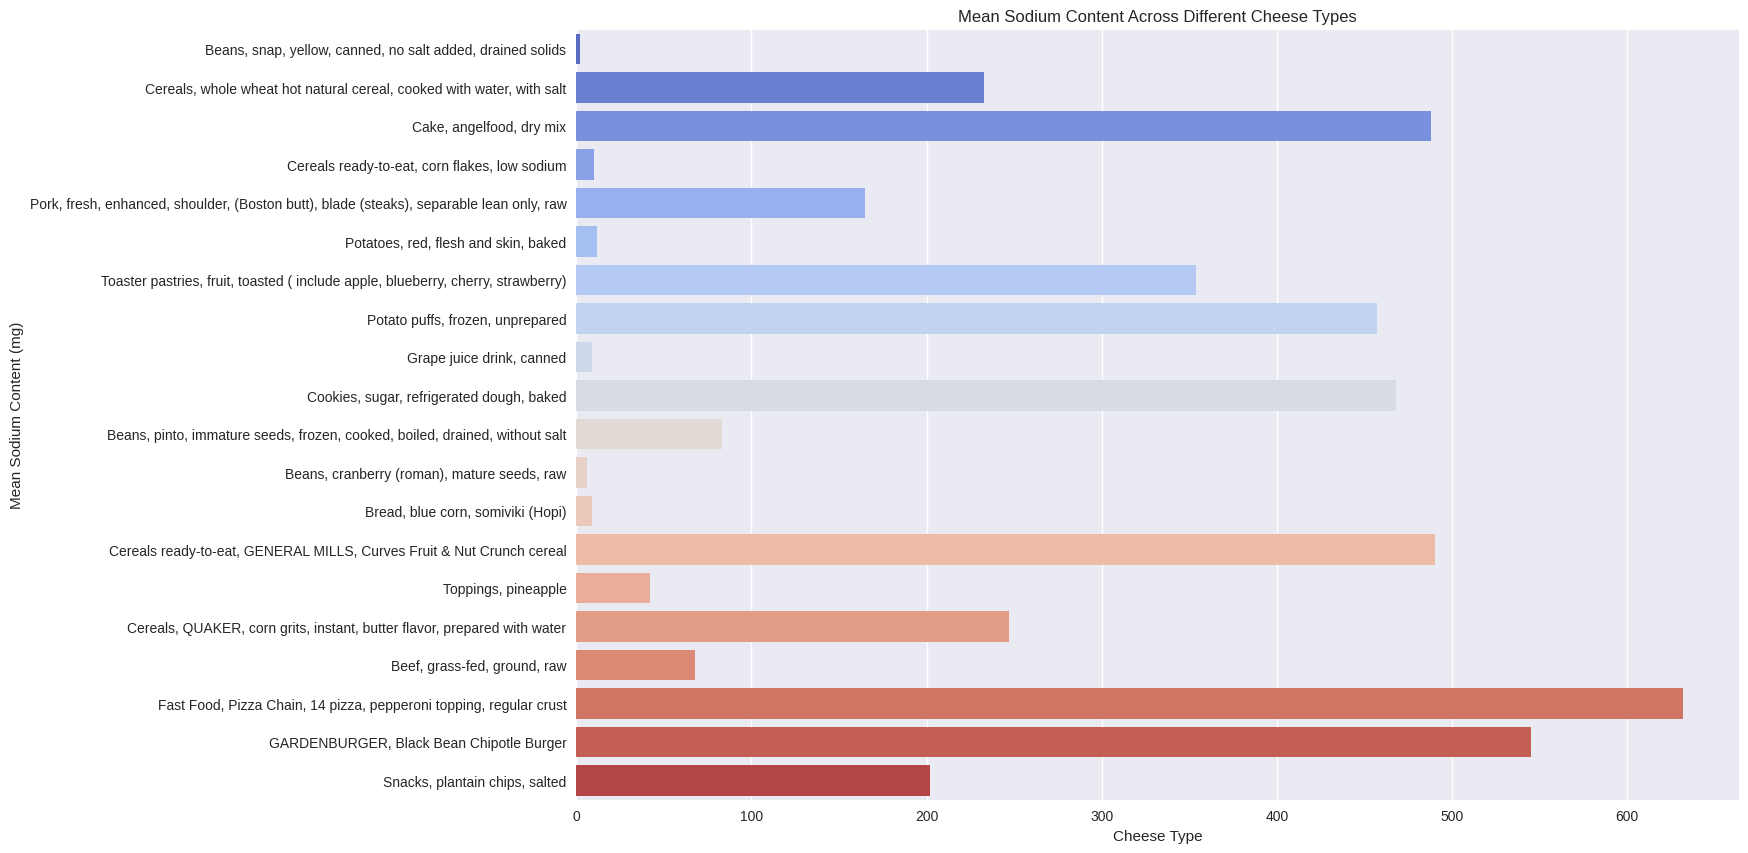

In [ ]:
# Insight: Sodium Content Across Different Cheese Types

# Filter the data for sodium content (mg)
sodium_data = merged_data[merged_data['nutrient'] == 'Sodium, Na']

# Aggregate data by taking the mean values for each cheese type
aggregated_data = sodium_data.groupby('food', as_index=False)['value'].mean()

# Select a subset of data to plot
subset = aggregated_data.sample(n=20, random_state=1)

# Create a bar chart
plt.figure(figsize=(15, 10))
sns.barplot(x='value', y='food', data=subset, palette='coolwarm')

# Set labels and title
plt.xlabel('Cheese Type')
plt.ylabel('Mean Sodium Content (mg)')
plt.title('Mean Sodium Content Across Different Cheese Types')

# Show the bar chart
plt.show()

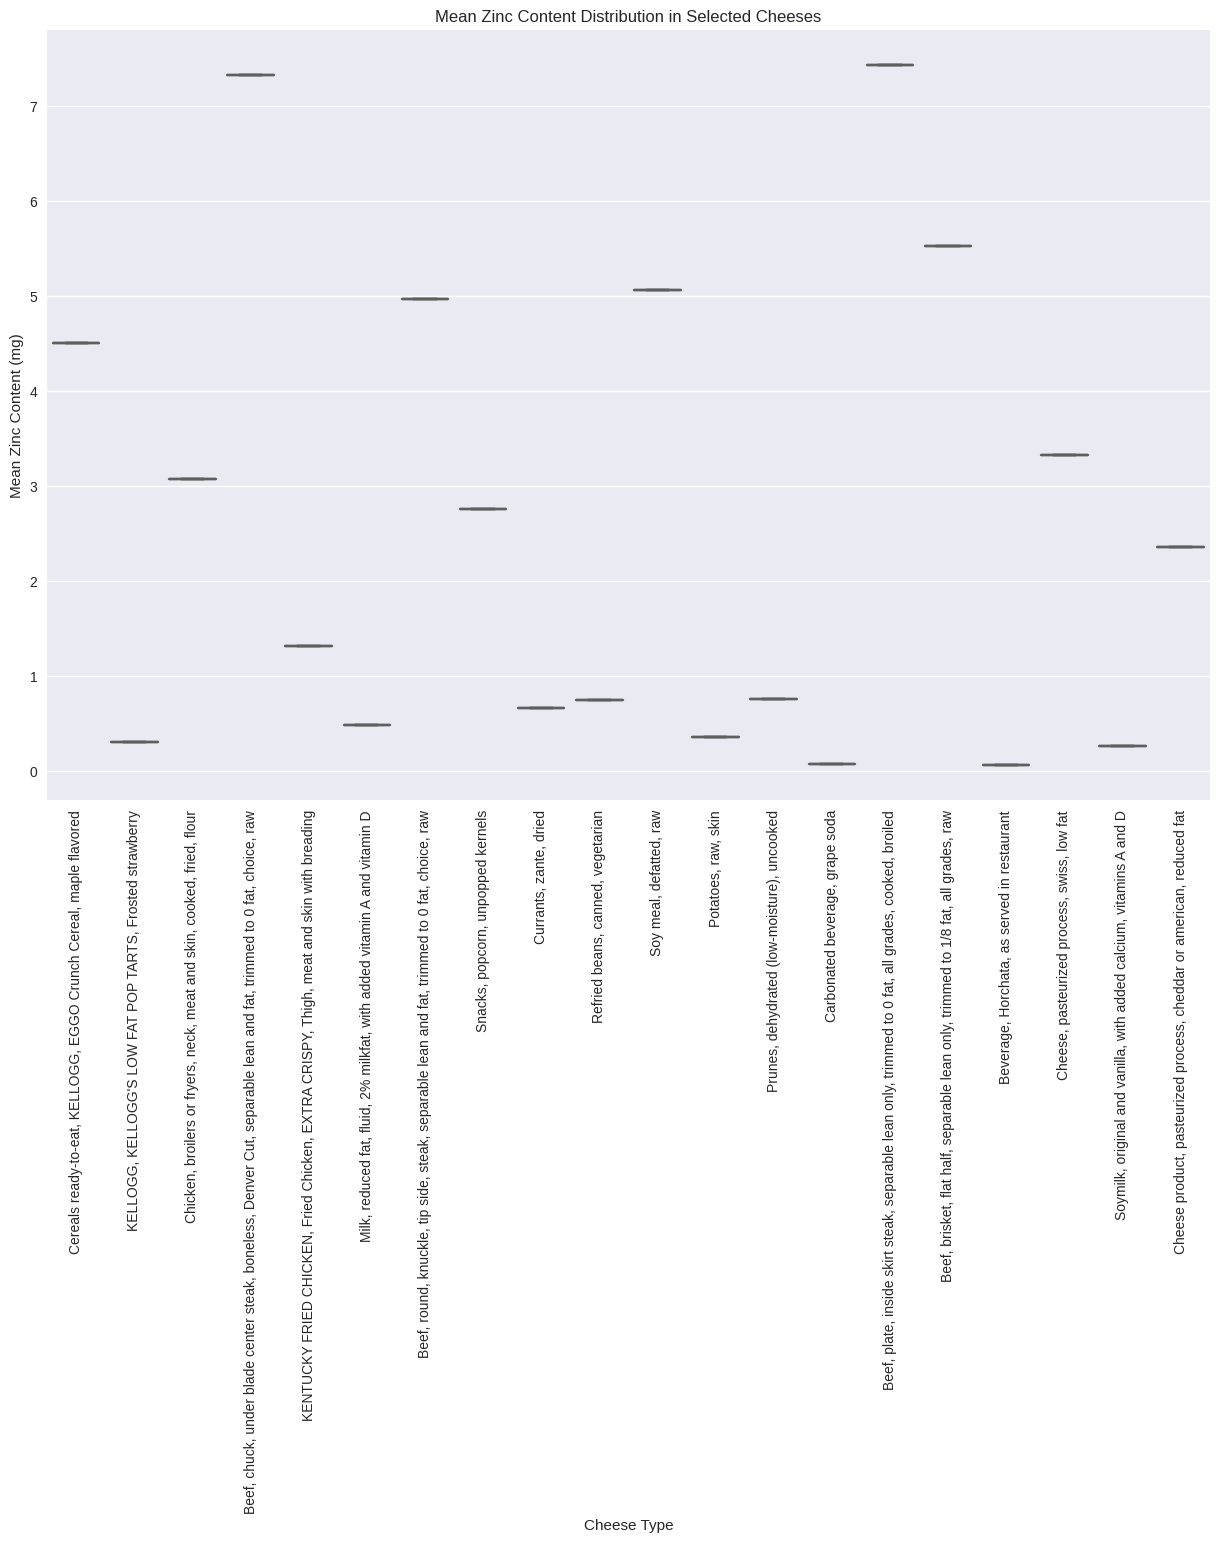

In [ ]:
# Insight: Zinc Content Distribution in Cheese

# Filter the data for zinc content (mg)
zinc_data = merged_data[merged_data['nutrient'] == 'Zinc, Zn']

# Aggregate data by taking the mean values for each cheese type
aggregated_data = zinc_data.groupby('food', as_index=False)['value'].mean()

# Select a subset of data to plot
subset = aggregated_data.sample(n=20, random_state=1)

# Create a box plot
plt.figure(figsize=(15, 10))
sns.boxplot(x='food', y='value', data=subset, palette='Set3')

# Set labels and title
plt.xlabel('Cheese Type')
plt.ylabel('Mean Zinc Content (mg)')
plt.title('Mean Zinc Content Distribution in Selected Cheeses')

# Rotate x-axis labels for better readability
plt.xticks(rotation=90)

# Show the box plot
plt.show()


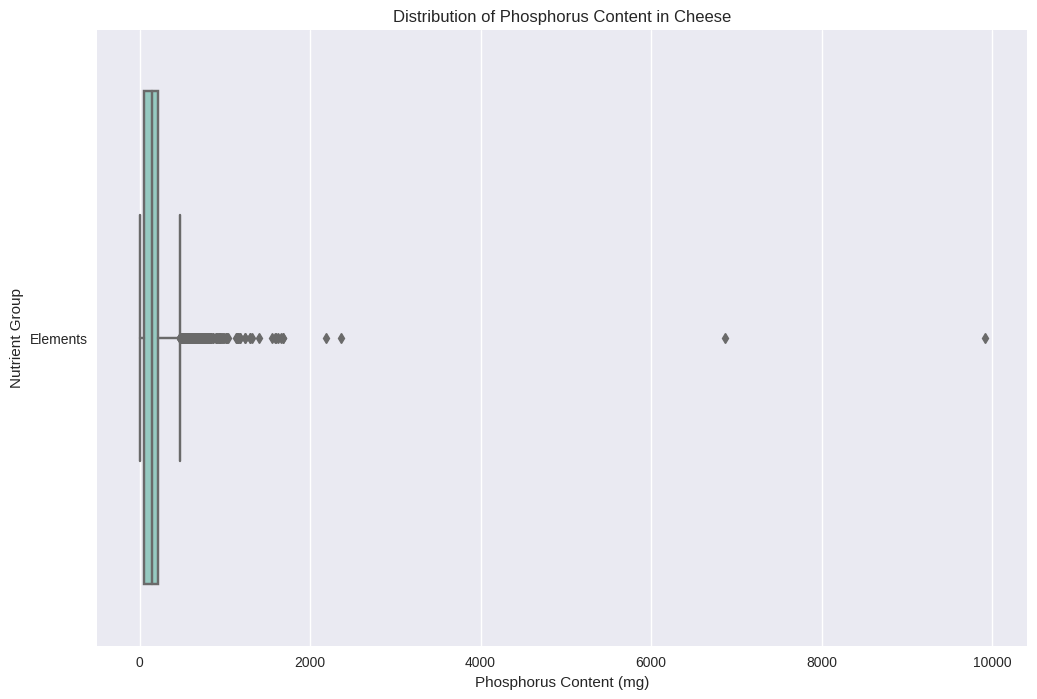

In [ ]:
# Insight: Distribution of Phosphorus Content in Cheese

# Filter the data for phosphorus content (mg)
phosphorus_data = merged_data[merged_data['nutrient'] == 'Phosphorus, P']

# Create a horizontal box plot
plt.figure(figsize=(12, 8))
sns.boxplot(x='value', y='nutrient_group', data=phosphorus_data, palette='Set3', orient='h')

# Set labels and title
plt.xlabel('Phosphorus Content (mg)')
plt.ylabel('Nutrient Group')
plt.title('Distribution of Phosphorus Content in Cheese')

# Show the horizontal box plot
plt.show()
